# Football API Tutorials

Tutorial showing how we can pull data back from an API
https://docs.football-data.org/general/v4/resources.html

### Step 1. First the pre-prep work

We need to get API tokens and any libraries we will use

In [ ]:
# First get your API tokens

from google.colab import userdata
token = userdata.get('FOOTBALL_API_TOKEN')


In [ ]:
# Install required packages if not already installed
!pip install pandas tabulate

import json
import requests
import pandas as pd

from tabulate import tabulate
from IPython.display import display

## Step 2. Match Data for a Specific Team

This cell pulls match data from the Football-Data API and filters it to include only matches involving the team specified by the variable `my_team`.

The output here will be just raw JSON.

### First we just explore the raw json

In [ ]:
# Set your team name here
my_team = "Liverpool"

uri = 'https://api.football-data.org/v4/matches'
headers = {'X-Auth-Token': token}

response = requests.get(uri, headers=headers)
data = response.json()

# Filter matches where my_team is involved (either as home or away team)
filtered_matches = []
for match in data.get('matches', []):
    home_team = match.get('homeTeam', {}).get('name', '')
    away_team = match.get('awayTeam', {}).get('name', '')
    if my_team in home_team or my_team in away_team:
        filtered_matches.append(match)

# Print the filtered matches in a nicely formatted JSON output
print(f"Found {len(filtered_matches)} match(es) involving {my_team}:\n")
print(json.dumps(filtered_matches, indent=4))


Found 0 match(es) involving Liverpool:

[]


### Let's make the table output prettier though!
That JSON was pretty ugly right?   So now we will use HTML to make it prettier.

In [ ]:
# Ensure filtered_matches is not empty
print("Number of filtered matches:", len(filtered_matches))

from IPython.display import HTML, display

if filtered_matches:
    match = filtered_matches[0]  # Use the first match for display
    card_html = f"""
    <div style="border:1px solid #ddd; border-radius:8px; padding:16px; margin:16px auto; max-width:600px; font-family: Arial, sans-serif; box-shadow: 2px 2px 6px rgba(0,0,0,0.1);">
      <div style="display:flex; align-items:center; justify-content: space-between;">
        <div style="text-align:center;">
          <img src="{match['homeTeam'].get('crest', '')}" alt="Home Crest" style="width:50px; height:50px;">
          <h3 style="margin: 8px 0 0;">{match['homeTeam'].get('name', 'N/A')}</h3>
        </div>
        <div>
          <h2 style="margin: 0 16px;">vs</h2>
        </div>
        <div style="text-align:center;">
          <img src="{match['awayTeam'].get('crest', '')}" alt="Away Crest" style="width:50px; height:50px;">
          <h3 style="margin: 8px 0 0;">{match['awayTeam'].get('name', 'N/A')}</h3>
        </div>
      </div>
      <hr style="margin:16px 0;">
      <p><strong>Date:</strong> {match.get('utcDate', 'N/A')}</p>
      <p><strong>Status:</strong> {match.get('status', 'N/A')}</p>
      <p><strong>Competition:</strong> {match.get('competition', {}).get('name', 'N/A')}</p>
      <p><strong>Matchday:</strong> {match.get('matchday', 'N/A')}</p>
      <p><strong>Score (FT):</strong> {match.get('score', {}).get('fullTime', {}).get('home', 'N/A')} - {match.get('score', {}).get('fullTime', {}).get('away', 'N/A')}</p>
      <p><strong>Score (HT):</strong> {match.get('score', {}).get('halfTime', {}).get('home', 'N/A')} - {match.get('score', {}).get('halfTime', {}).get('away', 'N/A')}</p>
      <p><strong>Last Updated:</strong> {match.get('lastUpdated', 'N/A')}</p>
    </div>
    """
    display(HTML(card_html))
else:
    print("No match data found.")


Number of filtered matches: 0
No match data found.


## Step 3. Getting the Premier League Table

### First lets explore the raw json

In [ ]:
# First getting the premier league table

# Define the endpoint for Premier League standings (competition code "PL")
url = "https://api.football-data.org/v4/competitions/PL/standings"
headers = {"X-Auth-Token": token}

response = requests.get(url, headers=headers)
data = response.json()

# Print the full API response in formatted JSON
print(json.dumps(data, indent=4))


{
    "filters": {
        "season": "2024"
    },
    "area": {
        "id": 2072,
        "name": "England",
        "code": "ENG",
        "flag": "https://crests.football-data.org/770.svg"
    },
    "competition": {
        "id": 2021,
        "name": "Premier League",
        "code": "PL",
        "type": "LEAGUE",
        "emblem": "https://crests.football-data.org/PL.png"
    },
    "season": {
        "id": 2287,
        "startDate": "2024-08-16",
        "endDate": "2025-05-25",
        "currentMatchday": 28,
        "winner": null
    },
    "standings": [
        {
            "stage": "REGULAR_SEASON",
            "type": "TOTAL",
            "group": null,
            "table": [
                {
                    "position": 1,
                    "team": {
                        "id": 64,
                        "name": "Liverpool FC",
                        "shortName": "Liverpool",
                        "tla": "LIV",
                        "crest": "https://cr

### Next make the table output prettier

### Premier League Table with Extra Details and Styling

This cell pulls the Premier League table (competition code "PL") from the API. It includes additional columns such as form, goals for, goals against, and goal difference. The top four positions (Champions League spots) are highlighted in light green, and the bottom three (drop zones) are highlighted in light coral.

In [ ]:
# Define the endpoint for Premier League standings (competition code "PL")
url = "https://api.football-data.org/v4/competitions/PL/standings"
headers = {"X-Auth-Token": token}

response = requests.get(url, headers=headers)
data = response.json()

# Extract the overall ("TOTAL") standings table
standings = data.get('standings', [])
total_table = None
for table in standings:
    if table.get('type') == "TOTAL":
        total_table = table.get('table', [])
        break

if total_table is None:
    print("Could not find a 'TOTAL' standings table.")
else:
    # Build a list of rows; note that we include "Pos" as a column.
    rows = []
    for entry in total_table:
        pos = entry.get('position')
        team_name = entry.get('team', {}).get('name')
        crest = entry.get('team', {}).get('crest', '')
        # Create an HTML snippet combining the crest and team name
        team_html = f'<img src="{crest}" width="30" style="vertical-align: middle; margin-right: 5px;"> {team_name}'
        rows.append({
            "Pos": pos,
            "Team": team_html,
            "P": entry.get('playedGames'),
            "W": entry.get('won'),
            "D": entry.get('draw'),
            "L": entry.get('lost'),
                        "GF": entry.get('goalsFor'),
            "GA": entry.get('goalsAgainst'),
            "GD": entry.get('goalDifference'),
            "Pts": entry.get('points'),
            "Form": entry.get('form')

        })

    # Create a DataFrame and sort by "Pos"
    df = pd.DataFrame(rows)
    df.sort_values(by="Pos", inplace=True)

    max_pos = df["Pos"].max()

    # Define a styling function to highlight top 4 and bottom 3 rows and alternate shading for the rest.
    def highlight_row(row):
        pos = row["Pos"]
        if pos <= 4:
            return ['background-color: lightgreen'] * len(row)
        elif pos >= max_pos - 2:
            return ['background-color: lightcoral'] * len(row)
        else:
            return ['background-color: #f2f2f2' if pos % 2 == 0 else 'background-color: white'] * len(row)

    # Create a styled DataFrame.
    # The additional table styles below hide the default index column:
    styled_df = (df.style
                 .apply(highlight_row, axis=1)
                 .set_table_styles([
                     # Basic table styles to remove extra padding/borders
                     {'selector': 'table', 'props': [('border-collapse', 'collapse'),('border', 'none')]},
                     {'selector': 'th, td', 'props': [('padding', '4px'), ('border', '0px')]},
                     # Hide the default index column (the first header cell and its body cells)
                     {'selector': 'thead th:first-child', 'props': [('display', 'none')]},
                     {'selector': 'tbody th', 'props': [('display', 'none')]}
                 ]))

    # Render as HTML with escape disabled so our Team column HTML is rendered
    html = styled_df.to_html(escape=False)

    print("Premier League Table (Champions League spots in green, drop zones in coral):")
    display(HTML(html))


Premier League Table (Champions League spots in green, drop zones in coral):


,Pos,Team,P,W,D,L,GF,GA,GD,Pts,Form
0,1,Liverpool FC,28,20,7,1,66,26,40,67,None
1,2,Arsenal FC,27,15,9,3,51,23,28,54,None
2,3,Nottingham Forest FC,27,14,6,7,44,33,11,48,None
3,4,Manchester City FC,27,14,5,8,53,37,16,47,None
4,5,Chelsea FC,27,13,7,7,52,36,16,46,None
5,6,Newcastle United FC,27,13,5,9,46,38,8,44,None
6,7,AFC Bournemouth,27,12,7,8,45,32,13,43,None
7,8,Brighton & Hove Albion FC,27,11,10,6,44,39,5,43,None
8,9,Fulham FC,27,11,9,7,40,36,4,42,None
9,10,Aston Villa FC,28,11,9,8,40,45,-5,42,None


## Step 3. Lets get the team info

### First we get ugly JSON format team info

In [ ]:

def get_team_details(team_id):
    """
    Retrieve details for a team from the Football-Data API.

    Args:
        team_id (int): The ID of the team you want details for.

    Returns:
        dict: A dictionary containing the team details.
              Returns None if there's an error.
    """


    url = f"https://api.football-data.org/v4/teams/{team_id}"
    headers = {"X-Auth-Token": token}

    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return None

# Example usage:
# Replace 64 with the team id you wish to retrieve (e.g., Liverpool FC is typically id 64)
team_id = 64
team_details = get_team_details(team_id)
if team_details:
    import json
    # Pretty-print the JSON output
    print(json.dumps(team_details, indent=4))


{
    "area": {
        "id": 2072,
        "name": "England",
        "code": "ENG",
        "flag": "https://crests.football-data.org/770.svg"
    },
    "id": 64,
    "name": "Liverpool FC",
    "shortName": "Liverpool",
    "tla": "LIV",
    "crest": "https://crests.football-data.org/64.png",
    "address": "Anfield Road Liverpool L4 0TH",
    "website": "http://www.liverpoolfc.tv",
    "founded": 1892,
    "clubColors": "Red / White",
    "venue": "Anfield",
    "runningCompetitions": [
        {
            "id": 2021,
            "name": "Premier League",
            "code": "PL",
            "type": "LEAGUE",
            "emblem": "https://crests.football-data.org/PL.png"
        },
        {
            "id": 2001,
            "name": "UEFA Champions League",
            "code": "CL",
            "type": "CUP",
            "emblem": "https://crests.football-data.org/CL.png"
        }
    ],
    "coach": {
        "id": 121014,
        "firstName": "Arne",
        "lastName": "

### Next we have provided as pretty HTML card

In [ ]:
#from IPython.display import HTML, display

def display_team_card(team_details):
    """
    Display team details as a nicely formatted HTML card.

    Args:
        team_details (dict): The team details dictionary from the Football-Data API.
    """
    # Extract key details
    area = team_details.get("area", {})
    team_name = team_details.get("name", "Unknown Team")
    short_name = team_details.get("shortName", "")
    crest = team_details.get("crest", "")
    address = team_details.get("address", "N/A")
    website = team_details.get("website", "")
    founded = team_details.get("founded", "N/A")
    club_colors = team_details.get("clubColors", "N/A")
    venue = team_details.get("venue", "N/A")
    running_competitions = team_details.get("runningCompetitions", [])
    coach = team_details.get("coach", {})
    squad = team_details.get("squad", [])
    num_players = len(squad)

    # Build the HTML for the team card
    card_html = f"""
    <div style="
         max-width:800px;
         margin:20px auto;
         border:1px solid #ddd;
         border-radius:10px;
         padding:20px;
         box-shadow: 2px 2px 10px rgba(0,0,0,0.1);
         font-family: Arial, sans-serif;">
      <div style="display:flex; align-items:center;">
          <img src="{crest}" alt="Team Crest" style="width:80px; height:80px; margin-right:20px; border-radius:50%;">
          <div>
              <h1 style="margin:0;">{team_name}</h1>
              <p style="margin:0; color:#555;">{short_name}</p>
          </div>
      </div>
      <hr style="margin:20px 0;">
      <div style="display:flex; flex-wrap:wrap;">
          <div style="flex:1; min-width:200px;">
              <p><strong>Address:</strong> {address}</p>
              <p><strong>Website:</strong> <a href="{website}" target="_blank">{website}</a></p>
              <p><strong>Founded:</strong> {founded}</p>
          </div>
          <div style="flex:1; min-width:200px;">
              <p><strong>Club Colors:</strong> {club_colors}</p>
              <p><strong>Venue:</strong> {venue}</p>
              <p><strong>Area:</strong> {area.get("name", "N/A")}</p>
          </div>
      </div>
      <hr style="margin:20px 0;">
      <div>
          <h2 style="margin-bottom:10px;">Running Competitions</h2>
          <div style="display:flex; flex-wrap:wrap;">
    """
    # Append running competitions (each with its emblem and name)
    for comp in running_competitions:
        comp_name = comp.get("name", "Unknown")
        comp_emblem = comp.get("emblem", "")
        card_html += f"""
            <div style="margin-right:20px; text-align:center;">
                <img src="{comp_emblem}" alt="{comp_name}" style="width:40px; height:40px;"><br>
                <span style="font-size:12px;">{comp_name}</span>
            </div>
        """
    card_html += """
          </div>
      </div>
      <hr style="margin:20px 0;">
      <div>
          <h2 style="margin-bottom:10px;">Coach</h2>
    """
    if coach:
        coach_name = coach.get("name", "N/A")
        coach_nationality = coach.get("nationality", "N/A")
        contract = coach.get("contract", {})
        contract_period = f"{contract.get('start', '')} to {contract.get('until', '')}" if contract else "N/A"
        card_html += f"""
          <p><strong>Name:</strong> {coach_name}</p>
          <p><strong>Nationality:</strong> {coach_nationality}</p>
          <p><strong>Contract:</strong> {contract_period}</p>
        """
    else:
        card_html += "<p>No coach information available.</p>"

    card_html += f"""
      </div>
      <hr style="margin:20px 0;">
      <div>
          <h2 style="margin-bottom:10px;">Squad</h2>
          <p><strong>Number of players:</strong> {num_players}</p>
      </div>
    </div>
    """
    display(HTML(card_html))

# Example usage:
# Assuming team_details is the JSON dictionary from get_team_details(team_id)
# display_team_card(team_details)


team_details = get_team_details(64)

# Check if team_details was retrieved
if team_details:
    display_team_card(team_details)
else:
    print("Team details not found.")

In [ ]:
from IPython.display import HTML, display

def display_squad_card(team_details):
    """
    Display squad details from team_details as a nicely formatted HTML card.

    Args:
        team_details (dict): The team details dictionary from the Football-Data API.
    """
    squad = team_details.get("squad", [])
    if not squad:
        display(HTML("<p>No squad information available.</p>"))
        return

    html = """
    <div style="
         max-width:800px;
         margin:20px auto;
         padding:20px;
         border:1px solid #ddd;
         border-radius:10px;
         box-shadow: 2px 2px 10px rgba(0,0,0,0.1);
         font-family: Arial, sans-serif;">
      <h2 style="margin-bottom:20px;">Squad Details</h2>
      <table style="width:100%; border-collapse: collapse;">
        <thead>
          <tr style="background-color: #f2f2f2;">
            <th style="padding:8px; text-align:left;">Name</th>
            <th style="padding:8px; text-align:left;">Position</th>
            <th style="padding:8px; text-align:left;">Date of Birth</th>
            <th style="padding:8px; text-align:left;">Nationality</th>
          </tr>
        </thead>
        <tbody>
    """
    for player in squad:
        name = player.get("name", "N/A")
        position = player.get("position", "N/A")
        dob = player.get("dateOfBirth", "N/A")
        nationality = player.get("nationality", "N/A")
        html += f"""
          <tr>
            <td style="padding:8px; border-bottom:1px solid #ddd;">{name}</td>
            <td style="padding:8px; border-bottom:1px solid #ddd;">{position}</td>
            <td style="padding:8px; border-bottom:1px solid #ddd;">{dob}</td>
            <td style="padding:8px; border-bottom:1px solid #ddd;">{nationality}</td>
          </tr>
        """
    html += """
        </tbody>
      </table>
    </div>
    """
    display(HTML(html))

# Example usage:
# Assuming you already retrieved team_details (for example, for Liverpool with team id 64)
# team_details = get_team_details(64)
# display_squad_card(team_details)

# Check if team_details was retrieved
if team_details:
    display_squad_card(team_details)
else:
    print("Team details not found.")


Name,Position,Date of Birth,Nationality
Alisson,Goalkeeper,1992-10-02,Brazil
Caoimhin Kelleher,Goalkeeper,1998-11-23,Ireland
Vítězslav Jaroš,Goalkeeper,2001-07-23,Czech Republic
Harvey Davies,Goalkeeper,2003-09-03,England
Isaac Mabaya,Midfield,2004-09-22,England
Kieran Morrison,Midfield,2006-11-09,Northern Ireland
Ranel Young,Offence,2005-12-26,England
Rio Ngumoha,Offence,2008-08-29,England
Trent Doherty,Offence,2006-06-30,Ireland
Alexis Mac Allister,Central Midfield,1998-12-24,Argentina


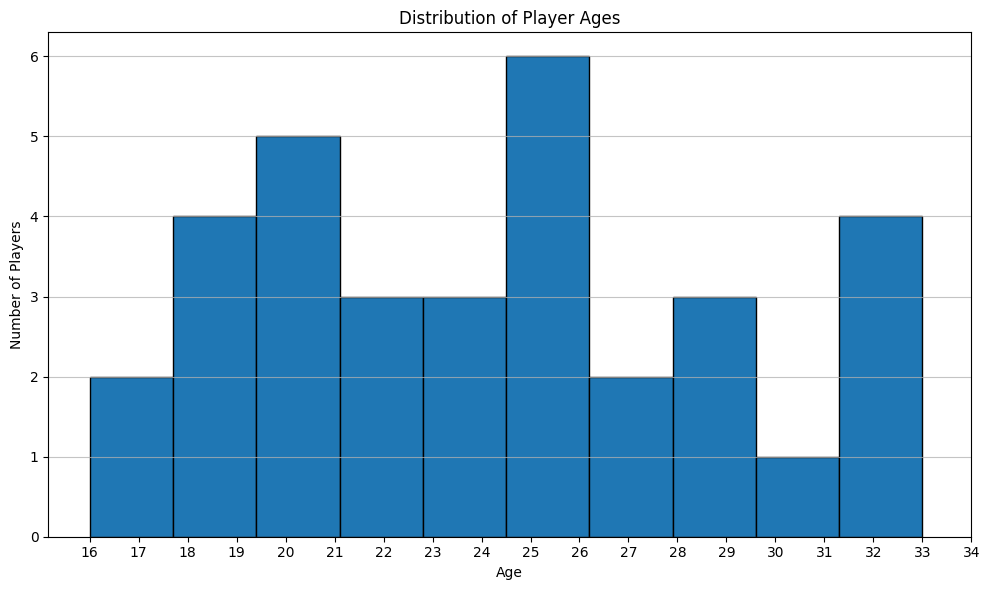

In [ ]:
!pip install matplotlib

import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, date

# ... (Assuming you have team_details and player_df from the previous steps) ...

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(player_df["Age"], bins=10, edgecolor='black')  # Adjust bins as needed
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.title("Distribution of Player Ages")
plt.xticks(range(int(player_df["Age"].min()), int(player_df["Age"].max()) + 2))  # Set x-axis ticks
plt.grid(axis='y', alpha=0.75)  # Add a grid for better readability
plt.tight_layout()
plt.show()

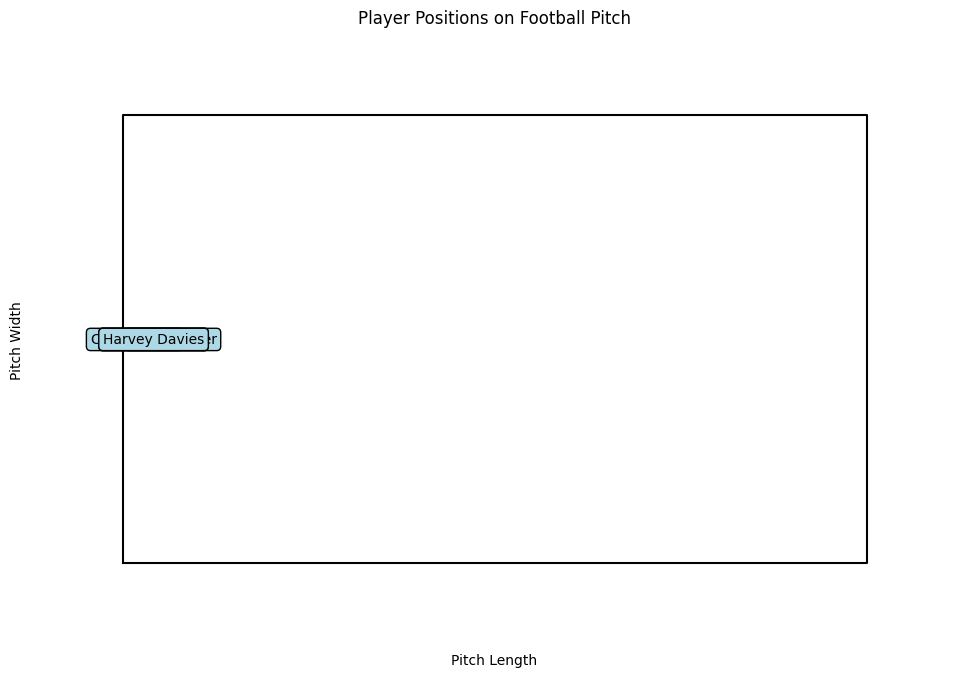

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, date

# Assuming you have team_details from the previous steps

# Extract player data from team_details
squad = team_details.get("squad", [])
player_data = []
for player in squad:
    name = player.get("name", "N/A")
    position = player.get("position", "N/A")  # Get the player's position
    dob = player.get("dateOfBirth", "N/A")

    # Calculate age
    try:
        dob_date = datetime.strptime(dob, "%Y-%m-%d").date()
        today = date.today()
        age = today.year - dob_date.year - ((today.month, today.day) < (dob_date.month, dob_date.day))
    except (ValueError, TypeError):  # Handle invalid date formats or missing dates
        age = "N/A"

    player_data.append([name, age, position]) # Append position

# Create DataFrame including the 'Position' column
player_df = pd.DataFrame(player_data, columns=["Name", "Age", "Position"])

# Define pitch dimensions (adjust as needed)
pitch_length = 120
pitch_width = 80

# Define position coordinates (adjust as needed)
positions = {
    "Goalkeeper": [(5, pitch_width / 2)],
    "Defender": [(20, 20), (20, 40), (20, 60), (20, pitch_width - 20)],
    "Midfielder": [(40, 20), (40, pitch_width - 20), (60, pitch_width / 2)],
    "Attacker": [(80, 20), (80, pitch_width - 20), (100, pitch_width / 2)],
}

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Draw pitch outline
ax.plot([0, 0, pitch_length, pitch_length, 0], [0, pitch_width, pitch_width, 0, 0], color="black")

# Plot players
for position, coords in positions.items():
    players_in_position = player_df[player_df["Position"] == position]
    for i, player in players_in_position.iterrows():
        x, y = coords[i % len(coords)]  # Cycle through coordinates to avoid overlap
        ax.text(x, y, player["Name"], ha="center", va="center", bbox=dict(facecolor="lightblue", edgecolor="black", boxstyle="round"))

# Set axis limits and labels
ax.set_xlim([-15, pitch_length + 15]) # Use set_xlim and set_ylim to set axis limits
ax.set_ylim([-15, pitch_width + 15]) # Use set_xlim and set_ylim to set axis limits
ax.set_xlabel("Pitch Length")
ax.set_ylabel("Pitch Width")
ax.set_title("Player Positions on Football Pitch")

# Remove axis ticks and spines
ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.show()